# Basic Statistics (Stat 101) with Python

## What statistical test should I use?

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.coloss.org/beebook/I/statistical-guidelines/figure-6/image_large")

## Goals
- Learn how to perform t-testing
- t-testing is used to find if there is any statically significant difference in the mean values of two samples
- help to answer many questions such as:
    - any difference in intelligence scores between male and female
    - any difference in cheating on spouse between religous people and people with no religion
    - any difference in profits between small-size models and luxurious hotels

## Assumptions of statistical tests
- Many statistical tests assume that the data is normally distributed
- Equal variances between different samples

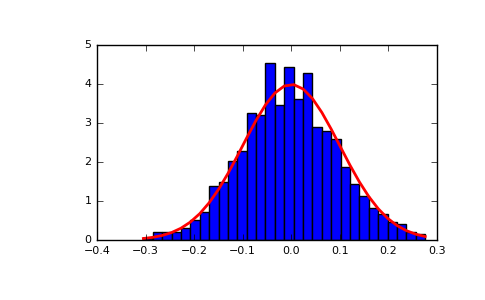

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("images/numpy-random-normal.png")

In [4]:
Image(url= "http://www.philender.com/courses/intro/notes3/cheby2.png")

# Loading python packages

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas.tools import plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data

In [6]:
# load tips.csv

import pandas as pd

data = pd.read_csv('data/tips.csv')
data.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Exploring data & Data visualization

In [8]:
# basic stats
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
# pivot for sex
data.groupby('sex').mean()

,total_bill,tip,size
sex,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


In [12]:
# pivot with time
data.groupby('time').mean()

,total_bill,tip,size
time,,,
Dinner,20.797159,3.102670,2.630682
Lunch,17.168676,2.728088,2.411765


In [14]:
# pivot with day
data.groupby(['day']).count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


In [16]:
# pivot with size
data.groupby(['size']).count()

,total_bill,tip,sex,smoker,day,time
size,,,,,,
1,4,4,4,4,4,4
2,156,156,156,156,156,156
3,38,38,38,38,38,38
4,37,37,37,37,37,37
5,5,5,5,5,5,5
6,4,4,4,4,4,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1159b2d90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115e535d0>]], dtype=object)

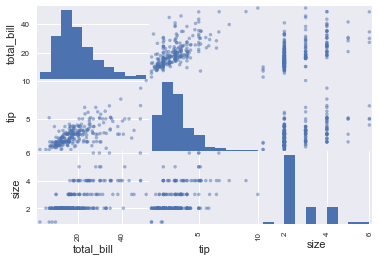

In [18]:
# plot scatter matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
from matplotlib.pyplot import *
pd.plotting.scatter_matrix(data[['total_bill', 'tip', 'size']])  

# Statistical (Hypothesis) Testing

## Normality test

In [19]:
# an illustration of normal distribution

h = sorted(data['total_bill'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit,'-o')
plt.hist(h,normed=True)      #use this to draw histogram of your data

AttributeError: 'module' object has no attribute 'plot'

In [21]:
# an illustration of normal distribution with tip

print stats.normaltest(data['tip'])

NormaltestResult(statistic=79.378625740747822, pvalue=5.7962943229071865e-18)


In [22]:
# test if the data is normally distributed

import scipy.stats as stats

print stats.normaltest(data['total_bill'])
print stats.normaltest(data['tip'])

NormaltestResult(statistic=45.117819123473303, pvalue=1.5951078766352727e-10)
NormaltestResult(statistic=79.378625740747822, pvalue=5.7962943229071865e-18)


In [23]:
# to print three decimals only
bill = stats.normaltest(data['total_bill'])
tip = stats.normaltest(data['tip'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % bill
print "The chi-square statistic is %.3f and the p-value is %.3f." % tip

The chi-square statistic is 45.118 and the p-value is 0.000.
The chi-square statistic is 79.379 and the p-value is 0.000.


p-value is small, so we assume that the data is normally distributed.

In [18]:
# test if size is normally distributed
print stats.normaltest(tips['size'])


NormaltestResult(statistic=64.558155322372855, pvalue=9.5802025400244721e-15)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117122a90>]], dtype=object)

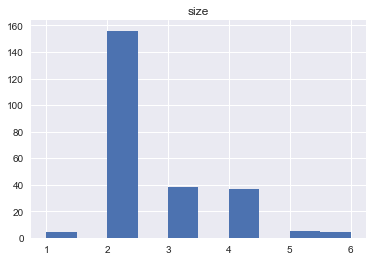

In [19]:
# plot a histogram with size and see if the data is normally distributed
tips.hist('size')


## t-test

- the most popular statical techique for hypothesis testing
- test if the mean (or average) of two groups or data samples is significantly different or not
- low p-value (< 0.01) is an indicator that there is significant difference in the two groups.

<img src ="http://www.socialresearchmethods.net/kb/Assets/images/stat_t3.gif">
http://www.socialresearchmethods.net/kb/stat_t.php

### 2-sample test

In [20]:
female_tip = tips[tips['sex'] == 'Female']['tip']
male_tip = tips[tips['sex'] == 'Male']['tip']
stats.ttest_ind(female_tip, male_tip)

Ttest_indResult(statistic=-1.3878597054212687, pvalue=0.16645623503456763)

In [21]:
#print three decimal points
two_sample = stats.ttest_ind(female_tip, male_tip)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is -1.388 and the p-value is 0.166.


- Null hypothesis says two means are almost same.
- p-value is a probability if the null hypothesis is true. A low p-value (< 0.01) means we can reject the null hypothesis
- Since we have a high p-value, we accept the null hypothesis that male and female give roughly same tips (No difference)

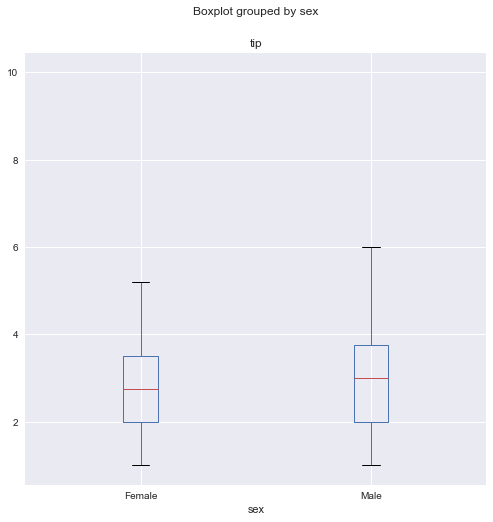

In [22]:
#Create a boxplot
tips.boxplot('tip', by='sex', figsize=(8, 8))

sex
Female    [[Axes(0.125,0.125;0.775x0.755)]]
Male      [[Axes(0.125,0.125;0.775x0.755)]]
dtype: object

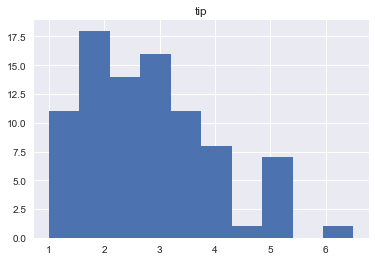

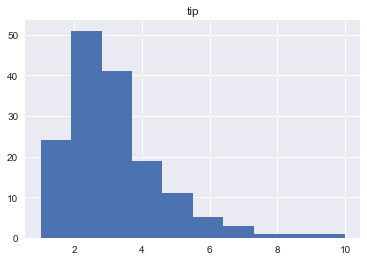

In [23]:
# two graphs
tips.groupby('sex').hist('tip')

In [24]:
# test if there is a significant difference in the mean of total bills of male and female
female_tip = tips[tips['sex'] == 'Female']['total_bill']
male_tip = tips[tips['sex'] == 'Male']['total_bill']
stats.ttest_ind(female_tip, male_tip)


Ttest_indResult(statistic=-2.2777940289803134, pvalue=0.023611666846859398)

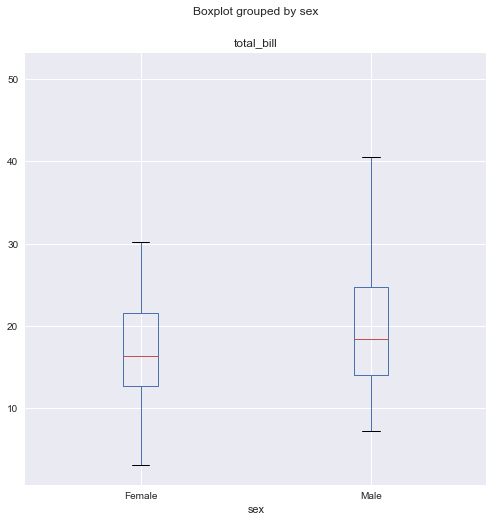

In [25]:
#Create a boxplot or histogram with total_bill and sex
tips.boxplot('total_bill', by='sex', figsize=(8, 8))


In [26]:
# test if there is a significant difference in the tip amount between smoker and non-smoker
smoker_tip = tips[tips['smoker'] == 'Yes']['tip']
nonsmoker_tip = tips[tips['sex'] == 'No']['tip']
stats.ttest_ind(female_tip, male_tip)


Ttest_indResult(statistic=-2.2777940289803134, pvalue=0.023611666846859398)

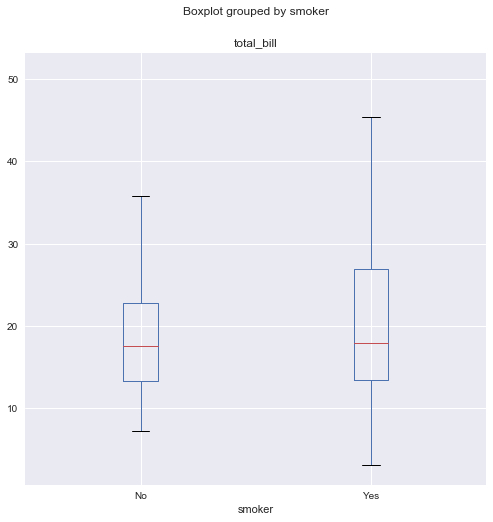

In [27]:
#Create a boxplot or histogram with tip and smoker
tips.boxplot('total_bill', by='smoker', figsize=(8, 8))


### Paired tests
- testing differences between two variables linked to same subjects (or individuals)

In [24]:
height = pd.read_csv("data/father_son_height.csv")
height.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


In [25]:
stats.ttest_rel(height['Father'], height['Son'])

Ttest_relResult(statistic=-11.786319389164751, pvalue=3.0273733779822012e-30)

In [26]:
#print three decimal points
results = stats.ttest_rel(height['Father'], height['Son'])
print "The t-statistic is %.3f and the p-value is %.3f." % results

The t-statistic is -11.786 and the p-value is 0.000.


Fathers and sons have different heights.

In [27]:
#Create a plot
plt.figure(figsize=(16,8))
plt.plot(height['Father'], label = 'Father')
plt.plot(height['Son'], label = 'Son')
plt.legend(loc ='best')

TypeError: 'module' object is not callable

In [28]:
# perform paired test with total_bill and tip
stats.ttest_rel(height['total_bill'], height['tip'])
results = stats.ttest_rel(height['total_bill'], height['tip'])
print "The t-statistic is %.3f and the p-value is %.3f." % results






KeyError: 'total_bill'

## Appendix: ANOVA test
- Analaysis of variance (ANOVA) is used to test differences **more than three samples** or groups

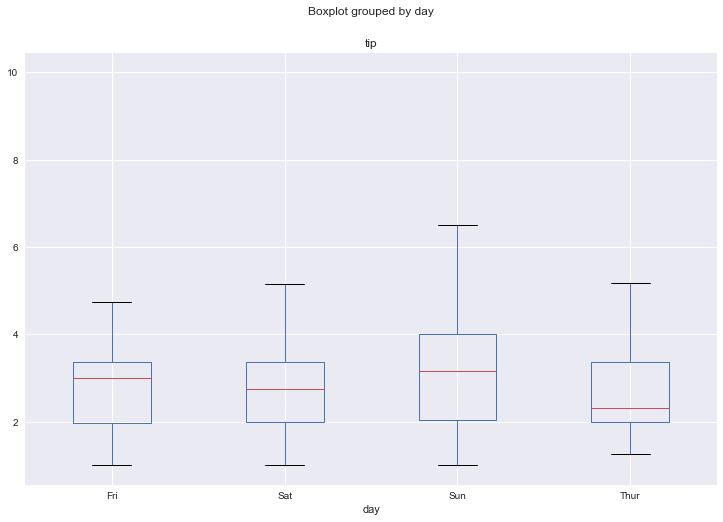

In [85]:
tips.boxplot('tip', by='day', figsize=(12, 8))

In [35]:
thur = tips[tips['day'] == 'Thur']['tip']
fri = tips[tips['day'] == 'Fri']['tip']
sat = tips[tips['day'] == 'Sat']['tip']
sun = tips[tips['day'] == 'Sun']['tip']

f_val, p_val = stats.f_oneway(thur, fri, sat, sun)  
  
print "One-way ANOVA P =", p_val  

One-way ANOVA P = 0.173588555304


In [36]:
# ANOVA test using the python package "statsmodels"
# If this package is not installed in your machine, do "conda install statsmodels" in command prompt (Win) / terminal (Mac)
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('tip ~ day', data=tips).fit()
                
aov_table = sm.stats.anova_lm(mod)
print aov_table

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


             df      sum_sq   mean_sq         F    PR(>F)
day         3.0    9.525873  3.175291  1.672355  0.173589
Residual  240.0  455.686604  1.898694       NaN       NaN


/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print pairwise_tukeyhsd(tips['tip'], tips['day'])

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 Fri    Sat    0.2584  -0.6444 1.1611 False 
 Fri    Sun    0.5204   -0.394 1.4348 False 
 Fri    Thur   0.0367  -0.8981 0.9715 False 
 Sat    Sun    0.262   -0.2977 0.8218 False 
 Sat    Thur  -0.2217  -0.8142 0.3709 False 
 Sun    Thur  -0.4837  -1.0938 0.1264 False 
--------------------------------------------


tip amount does not appear to be different by day

In [34]:
# read PlantGrowth.csv and perform ANOVA test
# this data contains three groups (ctrl, trt1, trt2)








# References

- http://cogmaster-stats.github.io/python-cogstats/basic_statistics.html
- http://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/#anovapy
- http://www.randalolson.com/2012/08/06/statistical-analysis-made-easy-in-python/
- http://cleverowl.uk/2015/07/01/using-one-way-anova-and-tukeys-test-to-compare-data-sets/

# Additional Resources

### spm1D : Python Pakcage for Statistical Tests
- http://www.spm1d.org/Documentation.html